In [1]:
import os
import pandas as pd
import numpy as np
from chest_radiography import *


In [2]:
annot_df = pd.read_csv("./pneumonia/annot.csv")
imgs = os.listdir("./pneumonia/images")
sampls = os.listdir("./pneumonia/samples")

In [3]:
print(annot_df.shape)
annot_df.head(7)

(30227, 6)


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0


In [4]:
annot_df['patientId'].unique().shape

(26684,)

In [5]:
annot_df['Target'].mean().round(3)

0.316

**inflamation area size**

In [6]:
width = np.nanmean(annot_df['width'].values)
height = np.nanmean(annot_df['height'].values)
print("avg width:", width.round())
print("avg height:", height.round())

avg width: 218.0
avg height: 329.0


In [7]:
annot_df.loc[:, "x":"height"].describe().round().loc["25%":"75%",:]

,x,y,width,height
25%,207.0,249.0,177.0,203.0
50%,324.0,365.0,217.0,298.0
75%,594.0,478.0,259.0,438.0


**number CXR records**

In [8]:
print("number of patients:", len(imgs))
print("small sample size:  ", len(sampls))

number of patients: 26684
small sample size:   3000


**CXR example**

In [3]:
cxr = CXR(pid="00436515-870c-4b36-a041-de91049b9ab4")

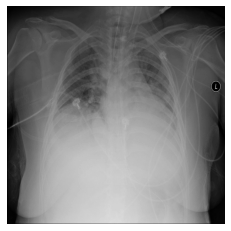

In [8]:

cxr.display_img


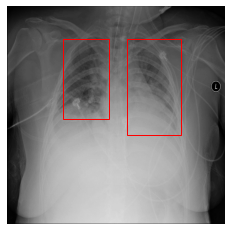

In [9]:
cxr.mark_symptoms


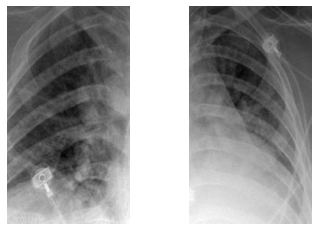

In [10]:
cxr.segment_symptom
